In [132]:
import pandas as pd
 
# Load the first CSV file
df1 = pd.read_csv("C:/Users/Ayshan Mustafazade/OneDrive/Desktop/Final_DDBM/Supplementary material/Ammonia_emissions.csv")
 
# Load the second CSV file
df2 = pd.read_csv("C:/Users/Ayshan Mustafazade/OneDrive/Desktop/Final_DDBM/Supplementary material/Pollution_taxes.csv")
 
# Merge the two dataframes on the common column (e.g., 'common_column')
merged_df = pd.merge(df1, df2, on='Country')
 
# Save the merged dataframe to a new CSV file
merged_df.to_csv("C:/Users/Ayshan Mustafazade/OneDrive/Desktop/Final_DDBM/Supplementary material/MergedFile.csv", index=False)
 
print("CSV files have been merged successfully!")

CSV files have been merged successfully!


In [133]:
merged_df

unit  Country  Time_x  E.M.Value  \
0       Tonne  Austria    2008      58258   
1       Tonne  Austria    2008      58258   
2       Tonne  Austria    2008      58258   
3       Tonne  Austria    2008      58258   
4       Tonne  Austria    2008      58258   
...       ...      ...     ...        ...   
441863  Tonne  Türkiye    2021     881344   
441864  Tonne  Türkiye    2021     881344   
441865  Tonne  Türkiye    2021     881344   
441866  Tonne  Türkiye    2021     881344   
441867  Tonne  Türkiye    2021     881344   

                                               Categories  Time_y  P.T.Value  
0                       Agriculture, forestry and fishing    2008       0.00  
1                       Agriculture, forestry and fishing    2009       0.00  
2                       Agriculture, forestry and fishing    2010       0.04  
3                       Agriculture, forestry and fishing    2011       0.04  
4                       Agriculture, forestry and fishing    2012       0.04  
...                                                   ...     ...        ...  
441863  Activities of extraterritorial organisations a...    2017       0.00  
441864  Activities of extraterritorial organisations a...    2018       0.00  
441865  Activities of extraterritorial organisations a...    2019       0.00  
441866  Activities of extraterritorial organisations a...    2020       0.00  
441867  Activities of extraterritorial organisations a...    2021       0.00  

[441868 rows x 7 columns]

In [134]:
# The input data set is named 'dataset' in Power BI
df = merged_df

In [135]:
# Drop the 'unit' column
df = df.drop(columns=['unit'])

In [136]:
df = df.drop(columns=['Time_x'])

In [137]:
# Filter the combined_data to keep only the specified categories
data = df[df['Categories'].isin([
    'Agriculture, forestry and fishing', 
    'Crop and animal production, hunting and related service activities'
])]

# Display the first few rows of the filtered dataset
print(data.head(15))

    Country  E.M.Value                                         Categories  \
0   Austria      58258                  Agriculture, forestry and fishing   
1   Austria      58258                  Agriculture, forestry and fishing   
2   Austria      58258                  Agriculture, forestry and fishing   
3   Austria      58258                  Agriculture, forestry and fishing   
4   Austria      58258                  Agriculture, forestry and fishing   
5   Austria      58258                  Agriculture, forestry and fishing   
6   Austria      58258                  Agriculture, forestry and fishing   
7   Austria      58258                  Agriculture, forestry and fishing   
8   Austria      58258                  Agriculture, forestry and fishing   
9   Austria      58258                  Agriculture, forestry and fishing   
10  Austria      58258                  Agriculture, forestry and fishing   
11  Austria      58258                  Agriculture, forestry and fishing   

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [139]:
# Drop rows with NaN values in the 'P.T.Value' column
data = data.dropna(subset=['P.T.Value'])

In [140]:
# Check if there are still NaN values
print(data['P.T.Value'].isna().sum())

0


In [141]:
# Check if there are still NaN values
print(data['E.M.Value'].isna().sum())

0


In [142]:
data = pd.get_dummies(data, columns=['Categories', 'Country'])

data.head()

E.M.Value  Time_y  P.T.Value  Categories_Agriculture, forestry and fishing  \
0      58258    2008       0.00                                          True   
1      58258    2009       0.00                                          True   
2      58258    2010       0.04                                          True   
3      58258    2011       0.04                                          True   
4      58258    2012       0.04                                          True   

   Categories_Crop and animal production, hunting and related service activities  \
0                                              False                               
1                                              False                               
2                                              False                               
3                                              False                               
4                                              False                               

   Country_Austria  Country_Belgium  Country_Bulgaria  Country_Croatia  \
0             True            False             False            False   
1             True            False             False            False   
2             True            False             False            False   
3             True            False             False            False   
4             True            False             False            False   

   Country_Cyprus  ...  Country_Norway  Country_Poland  Country_Portugal  \
0           False  ...           False           False             False   
1           False  ...           False           False             False   
2           False  ...           False           False             False   
3           False  ...           False           False             False   
4           False  ...           False           False             False   

   Country_Romania  Country_Slovakia  Country_Slovenia  Country_Spain  \
0            False             False             False          False   
1            False             False             False          False   
2            False             False             False          False   
3            False             False             False          False   
4            False             False             False          False   

   Country_Sweden  Country_Switzerland  Country_Türkiye  
0           False                False            False  
1           False                False            False  
2           False                False            False  
3           False                False            False  
4           False                False            False  

[5 rows x 36 columns]

In [143]:
# import pandas as pd
# from IPython.display import HTML

# # Create a sample DataFrame
# # data = {'Column1': [1, 2, 3, 4, 5],
# #         'Column2': ['A', 'B', 'C', 'D', 'E']}
# df = pd.DataFrame(data)

# # Save the DataFrame to a CSV file
# csv_file = 'sample_data.csv'
# df.to_csv(csv_file, index=False)

# # Function to create a download link
# def create_download_link(filename):
#     import base64
#     from IPython.display import HTML
#     from pathlib import Path

#     file_path = Path(filename)
#     file_base64 = base64.b64encode(file_path.read_bytes()).decode()
#     return HTML(f'<a download="{filename}" href="data:text/csv;base64,{file_base64}" target="_blank">Download {filename}</a>')

# # Create and display the download link
# create_download_link(csv_file)

In [144]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
label_encoders['P.T.Value'] = LabelEncoder()
data['P.T.Value'] = label_encoders['P.T.Value'].fit_transform(data['P.T.Value'].values.ravel())

In [145]:
X_class = data.drop('P.T.Value', axis=1)
y_class = data['P.T.Value']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [146]:
scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

In [147]:
X_train_class_data = pd.DataFrame(X_train_class)


object_columns = X_train_class_data.select_dtypes(include=['object']).columns
if not object_columns.empty:
    print(X_train_class_data[object_columns].head())
else:
    print("No remaining string values in the encoded features.")

No remaining string values in the encoded features.


In [148]:
print(f"X_train shape: {X_train_class.shape}")
print(f"X_test shape: {X_test_class.shape}")
print(f"y_train shape: {y_train_class.shape}")
print(f"y_test shape: {y_test_class.shape}")

X_train shape: (9676, 35)
X_test shape: (2420, 35)
y_train shape: (9676,)
y_test shape: (2420,)


In [149]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [150]:
#regression

X_reg = data.drop('P.T.Value', axis=1)
y_reg = data['P.T.Value']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [151]:
regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor(n_estimators=10, random_state=0)

In [152]:
# Ensure the test data is in the correct format
X_test_reg = np.array(X_test_reg, dtype=np.float32)
y_test_reg = np.array(y_test_reg, dtype=np.float32)

# Make predictions
y_pred_reg = regressor.predict(X_test_reg)

# Print results with desired formatting
np.set_printoptions(precision=2)
y_test_ar = y_test_reg.reshape(-1, 1)
result = np.concatenate((y_pred_reg.reshape(len(y_pred_reg), 1), y_test_ar), axis=1)
print(result)

[[117. 117.]
 [ 42.  42.]
 [117. 117.]
 ...
 [  5.   5.]
 [ 14.  14.]
 [149. 149.]]


C:\Users\Ayshan Mustafazade\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [153]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
print(f'rmse: {rmse}')

rmse: 0.3382685617001834


In [154]:
r_squared = r2_score(y_test_reg, y_pred_reg)
print(f'r_squared: {r_squared}')

r_squared: 0.9999805327958099


In [155]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Prepare the data for linear regression
X = data.drop('P.T.Value', axis=1)
y = data['P.T.Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [157]:
# Make predictions
y_pred = linear_regressor.predict(X_test)

In [158]:
# Calculate RMSE and R^2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R^2: {r_squared}')

RMSE: 14.538868402822965
R^2: 0.9640381898081611


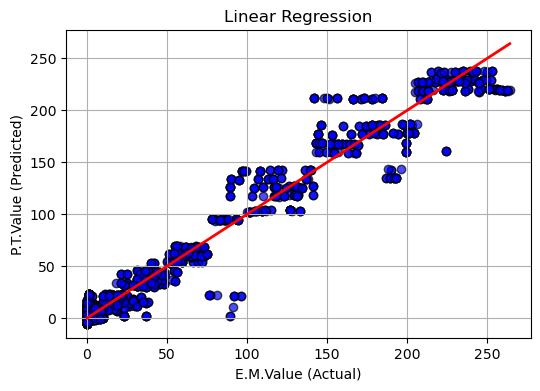

In [159]:
# Plotting the results
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('E.M.Value (Actual)')
plt.ylabel('P.T.Value (Predicted)')
plt.title('Linear Regression')
plt.grid(True)
plt.show()

In [160]:
# 2 Polynomial

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

linear_regressor_poly = LinearRegression()
linear_regressor_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = linear_regressor_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r_squared_poly = r2_score(y_test_poly, y_pred_poly)

print(f'Polynomial RMSE: {rmse_poly}')
print(f'Polynomial R^2: {r_squared_poly}')


Polynomial RMSE: 9.890878031904332
Polynomial R^2: 0.9833562943630725


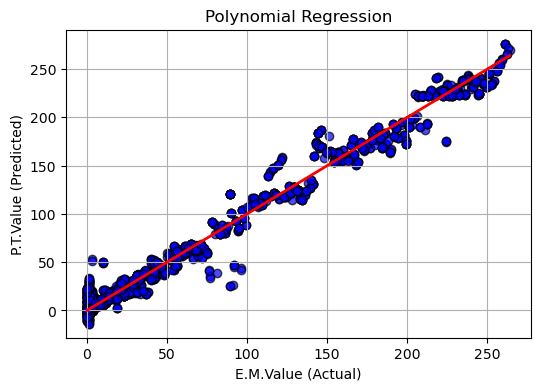

In [161]:
# Plotting the results
plt.figure(figsize=(6, 4))
plt.scatter(y_test_poly, y_pred_poly, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], color='red', linewidth=2)
plt.xlabel('E.M.Value (Actual)')
plt.ylabel('P.T.Value (Predicted)')
plt.title('Polynomial Regression')
plt.grid(True)
plt.show()

In [162]:
# 3 xgboost

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the model
xgboost_regressor = xgb.XGBRegressor()

In [163]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [164]:
# Perform grid search
grid_search = GridSearchCV(estimator=xgboost_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [165]:
# Best model from grid search
best_xgb_model = grid_search.best_estimator_

In [166]:
# Make predictions
y_pred_xgb = best_xgb_model.predict(X_test)

In [167]:
# Calculate RMSE and R²
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost RMSE: {rmse_xgb}')
print(f'XGBoost R^2: {r2_xgb}')

XGBoost RMSE: 1.423794147239982
XGBoost R^2: 0.9996551146554284


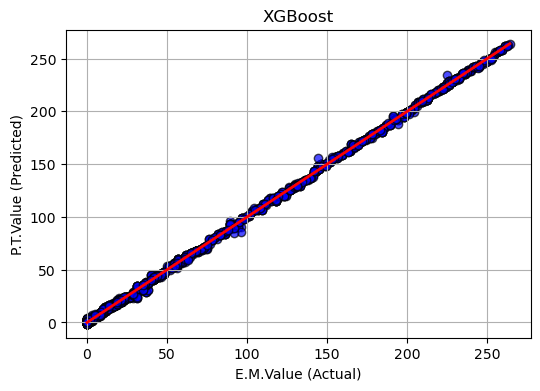

In [168]:
# Plotting the results
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_xgb, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('E.M.Value (Actual)')
plt.ylabel('P.T.Value (Predicted)')
plt.title('XGBoost')
plt.grid(True)
plt.show()

In [169]:
from lime.lime_tabular import LimeTabularExplainer
from random import randint

# Adding LIME explanations
# Create a LimeTabularExplainer
explainer = LimeTabularExplainer(training_data=np.array(X_train),
                                 mode='regression',
                                 feature_names=X_train.columns,
                                 discretize_continuous=True)

In [170]:

# Explain a single prediction (e.g., the first prediction)
i = 0  # Index of the instance you want to explain
exp = explainer.explain_instance(data_row=X_test.iloc[i],
                                 predict_fn=best_xgb_model.predict)

C:\Users\Ayshan Mustafazade\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Ayshan Mustafazade\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Ayshan Mustafazade\anaconda3\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

In [171]:
# Display the explanation
exp.show_in_notebook(show_table=True)

# Exlpanation

For a chosen instance for example 6999 the result was a lot of copuntries especially (list the top 3 from visual) contributed negatively to the predicted value while france (stil in instance 5000) contributed positively negative contrbution means lower prediction and vice versa. It means, different factors associated with those countries eg; their corresponding pt values or time contributed either psotively/raisedor negatively/lowered to the prediction

# Direct Correlation:

The model shows a strong linear relationship between the predicted and actual values, suggesting that E.M.Value is a significant predictor of P.T.Value.
If E.M.Value increases, we can expect P.T.Value to increase as well, given a direct positive correlation. This is inferred from the model's ability to predict P.T.Value accurately using E.M.Value.

# Conclusion
Positive Impact: As E.M.Value increases, P.T.Value is expected to increase. This relationship is captured effectively by the model.
Model Confidence: The high accuracy of the model (low RMSE and high R²) gives us confidence that this relationship is consistent and reliable.


# Practical Implications
Policy and Decision Making: Understanding this relationship helps in policy-making decisions where increasing emissions (E.M.Value) can be directly linked to higher pollution taxes (P.T.Value), thereby incentivizing reduction in emissions.
Predictive Use: The model can be used to predict future P.T.Value based on projected E.M.Value, aiding in financial planning and regulatory compliance.